In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem original
imagem = cv2.imread("Images/handpicture2.jpg")

In [14]:
# Aplicar um filtro Gaussiano para suavizar
suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)

# Subtrair a imagem suavizada da original para realçar os detalhes
detalhes = cv2.subtract(imagem, suavizada)

# Aplicar um filtro de sharpening para realçar mais os detalhes
kernel_sharpening = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])

sharpened = cv2.filter2D(detalhes, -1, kernel_sharpening)

# Converter para LAB para aplicar CLAHE (realce adaptativo de contraste)
lab = cv2.cvtColor(sharpened, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

# Aplicar CLAHE (Equalização Adaptativa)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l = clahe.apply(l)

# Recombinar os canais LAB e converter de volta para BGR
lab = cv2.merge((l, a, b))
final = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)


ValueError: num must be an integer with 1 <= num <= 3, not 4

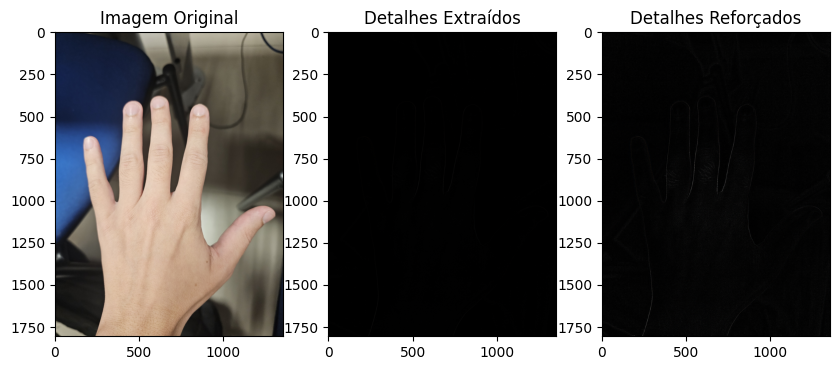

In [16]:
# Mostrar as imagens
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Detalhes Extraídos")
plt.imshow(cv2.cvtColor(detalhes, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title("Detalhes Reforçados")
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 4)
plt.title("Detalhes Reforçados")
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))


plt.show()